In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ship-exhaust/scikitlearn/default/5/evaluation_base_report.csv
/kaggle/input/ship-exhaust/scikitlearn/default/5/evaluation_report.csv
/kaggle/input/ship-exhaust/scikitlearn/default/5/ship_emission_lgbm_minimal.pkl
/kaggle/input/ship-exhaust/scikitlearn/default/5/tuning_model.csv


In [2]:
VERSION=5

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_metrics = pd.read_csv(f"/kaggle/input/ship-exhaust/scikitlearn/default/{VERSION}/evaluation_report.csv")
df_metrics['Emission_Mode'] = df_metrics['Target'].apply(lambda x: x.split('_')[0]) # Tách E1, E2...

e_summary = df_metrics.groupby('Emission_Mode').agg({
    'R2': 'mean',
    'MAPE': 'mean',
    'MAE': 'mean',
    'Mean_Value': 'mean'
}).reset_index()

e_summary = e_summary.sort_values(by='Emission_Mode')

print("="*65)
print(f"{'Group':<12} | {'mean of':<15} | {'mean of MAPE(%)':<20}")
print("-" * 65)

for _, row in e_summary.iterrows():
    print(f"{row['Emission_Mode']:<12} | {row['R2']:<15.5f} | {row['MAPE']:<20.4f}")

print("="*65)

print(e_summary[['Emission_Mode', 'MAE', 'Mean_Value']].to_string(index=False))

Group        | mean of         | mean of MAPE(%)     
-----------------------------------------------------------------
E1           | 0.95004         | 7.0777              
E2           | 0.95004         | 7.7190              
E3           | 0.99672         | 2.1031              
E4           | 0.99592         | 2.1498              
E5           | 0.99092         | 5.4176              
Emission_Mode          MAE   Mean_Value
           E1 1.547824e+04 3.354442e+05
           E2 1.339792e+05 2.453383e+06
           E3 3.002673e+02 1.827926e+04
           E4 2.066423e+04 1.172747e+06
           E5 1.916345e+06 5.260214e+07


In [4]:
import pandas as pd
import numpy as np

df_metrics = pd.read_csv(f"/kaggle/input/ship-exhaust/scikitlearn/default/{VERSION}/evaluation_base_report.csv")

def extract_substance(target_name):
    parts = target_name.split('_')
    if len(parts) > 1:
        return "_".join(parts[1:])
    return target_name

df_metrics['Substance'] = df_metrics['Target'].apply(extract_substance)

substance_summary = df_metrics.groupby('Substance').agg({
    'R2': 'mean',
    'MAPE': 'mean',
    'MAE': 'mean',
    'Mean_Value': 'mean'
}).reset_index()

substance_summary = substance_summary.sort_values(by='MAPE', ascending=False)

print("="*65)
print(f"{'EMISSIONS':<12} | {'mean of R2':<15} | {'mean of MAPE(%)':<20}")
print("-" * 65)

for _, row in substance_summary.iterrows():
    print(f"{row['Substance']:<12} | {row['R2']:<15.5f} | {row['MAPE']:<20.4f}")

print("="*65)

print(substance_summary[['Substance', 'MAE', 'Mean_Value']].to_string(index=False))

EMISSIONS    | mean of R2      | mean of MAPE(%)     
-----------------------------------------------------------------
CO           | 0.88834         | 8.6070              
NOx          | 0.97784         | 8.1004              
PM2.5        | 0.90282         | 8.0044              
PM10         | 0.90341         | 7.9309              
HC           | 0.92077         | 7.2973              
CH4          | 0.92079         | 7.2940              
N2O          | 0.96820         | 5.5045              
SOx          | 0.98127         | 4.1410              
CO2          | 0.98133         | 4.1353              
Substance          MAE   Mean_Value
       CO 7.635453e+03 1.616072e+05
      NOx 9.720539e+04 1.456650e+06
    PM2.5 1.099421e+03 2.460563e+04
     PM10 1.216103e+03 2.746114e+04
       HC 2.790165e+03 5.950139e+04
      CH4 5.578513e+01 1.190028e+03
      N2O 1.671129e+02 4.198709e+03
      SOx 2.225949e+03 6.035076e+04
      CO2 3.682125e+06 9.995416e+07


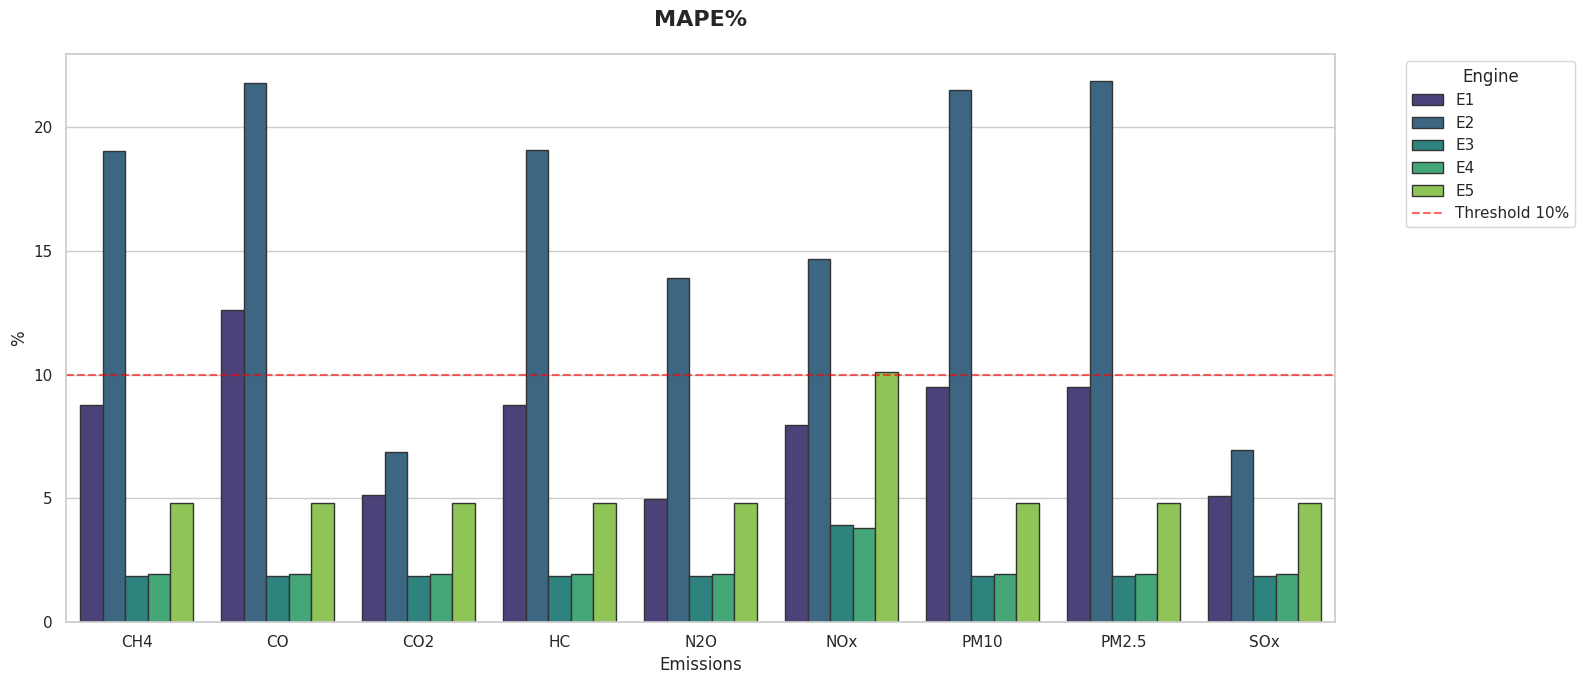

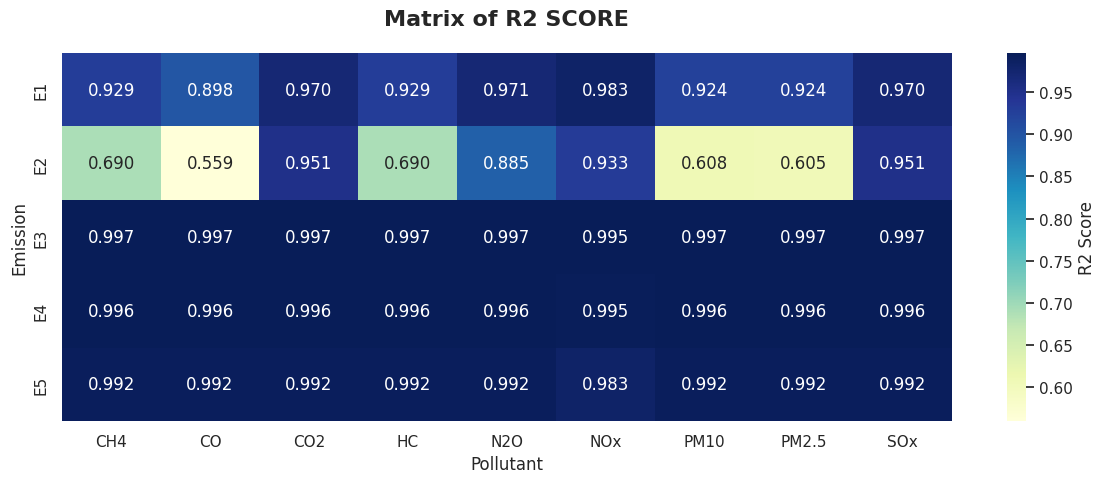

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

df_clean = df_metrics
df_clean['Emission'] = df_clean['Target'].apply(lambda x: x.split('_')[0])
df_clean['Pollutant'] = df_clean['Target'].apply(lambda x: x.split('_')[-1])

plt.figure(figsize=(16, 7))
g = sns.barplot(
    data=df_clean.sort_values(['Pollutant', 'Emission']),
    x='Pollutant', y='MAPE', hue='Emission',
    palette="viridis", edgecolor=".2"
)

plt.axhline(y=10, color='red', linestyle='--', alpha=0.6, label='Threshold 10%')
plt.title('MAPE%', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('%', fontsize=12)
plt.xlabel('Emissions', fontsize=12)
plt.legend(title='Engine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

pivot_r2 = df_clean.pivot(index="Emission", columns="Pollutant", values="R2")

plt.figure(figsize=(12, 5))
sns.heatmap(pivot_r2, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'R2 Score'})
plt.title('Matrix of R2 SCORE', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

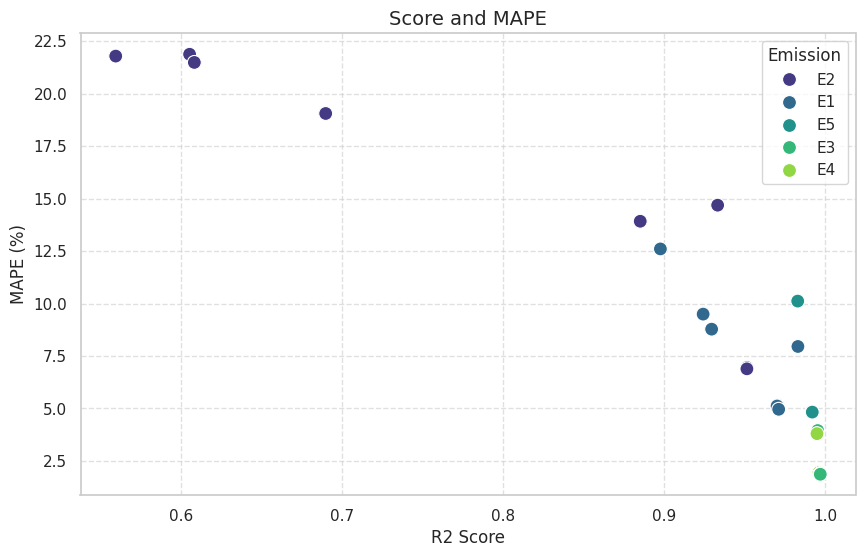

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_metrics, x='R2', y='MAPE', hue='Emission', s=100, palette='viridis')
plt.title('Score and MAPE', fontsize=14)
plt.xlabel('R2 Score')
plt.ylabel('MAPE (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

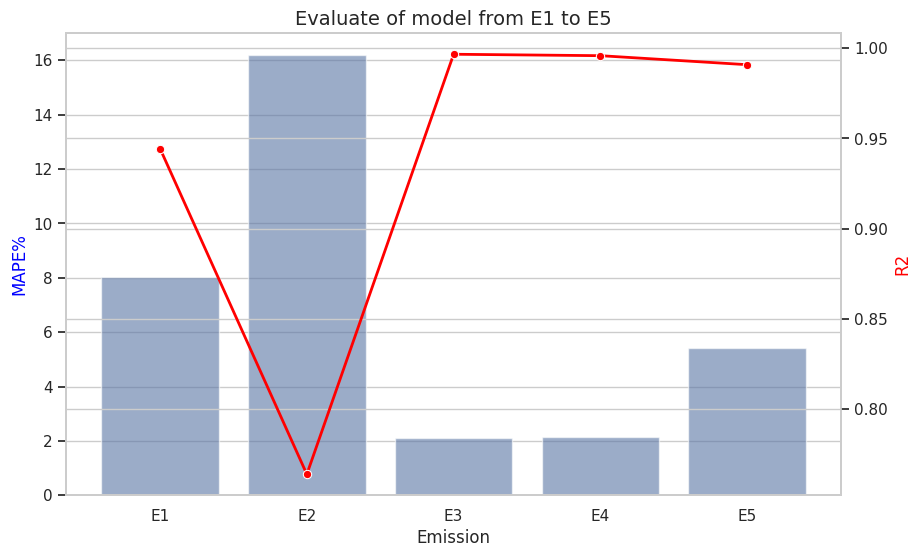

In [7]:
avg_metrics = df_metrics.groupby('Emission')[['R2', 'MAPE']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
sns.barplot(x='Emission', y='MAPE', data=avg_metrics, ax=ax1, alpha=0.6)
sns.lineplot(x='Emission', y='R2', data=avg_metrics, ax=ax2, color='red', marker='o', linewidth=2)

ax1.set_ylabel('MAPE%', color='blue')
ax2.set_ylabel('R2', color='red')
plt.title('Evaluate of model from E1 to E5', fontsize=14)
plt.show()
